In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
data = pd.read_csv(r'C:\Users\acer\Documents\Online_Sales_Data.csv')
data

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,01-01-2024,Electronics,iPhone 14 Pro,2,1000,2000,North America,Credit Card
1,10002,02-01-2024,Home Appliances,Dyson V11 Vacuum,1,500,500,Europe,PayPal
2,10003,03-01-2024,Clothing,Levi's 501 Jeans,3,70,210,Asia,Debit Card
3,10004,04-01-2024,Books,The Da Vinci Code,4,16,64,North America,Credit Card
4,10005,05-01-2024,Beauty Products,Neutrogena Skincare Set,1,90,90,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,23-08-2024,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,160,160,Europe,PayPal
236,10237,24-08-2024,Clothing,Nike Air Force 1 Sneakers,3,90,270,Asia,Debit Card
237,10238,25-08-2024,Books,The Handmaid's Tale by Margaret Atwood,3,11,33,North America,Credit Card
238,10239,26-08-2024,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55,55,Europe,PayPal


## Checking Null Values

In [5]:
data.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [6]:
data.describe()


,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.416667,335.733333
std,69.42622,1.322454,429.441168,485.795637
min,10001.00000,1.000000,7.000000,7.000000
25%,10060.75000,1.000000,30.000000,63.000000
50%,10120.50000,2.000000,90.000000,180.000000
75%,10180.25000,3.000000,250.000000,399.250000
max,10240.00000,10.000000,3900.000000,3900.000000


## Plotting

C:\Users\acer\AppData\Local\Temp\ipykernel_8652\2806764863.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




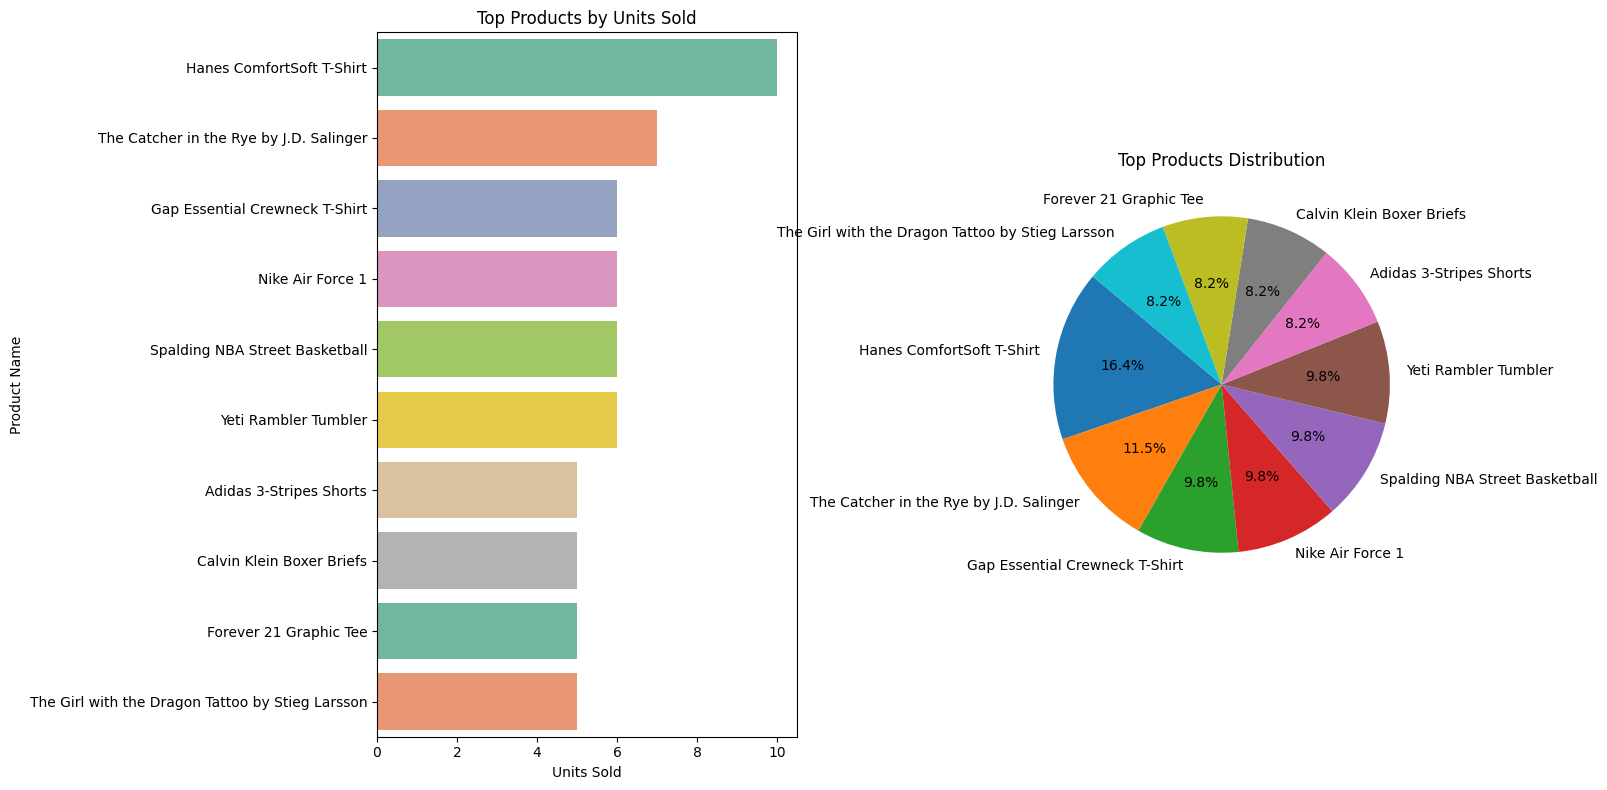

In [36]:

df = pd.DataFrame(data)
product_units_sold = df.groupby('Product Name')['Units Sold'].sum()

top_products = product_units_sold.nlargest(10)
df_top_products = df[df['Product Name'].isin(top_products.index)]
df_top_products = df_top_products.groupby('Product Name').sum().reindex(top_products.index)
top_products_proportions = top_products / top_products.sum()
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  

sns.barplot(data=df_top_products, y=df_top_products.index, x='Units Sold', ax=axs[0], palette='Set2')
axs[0].set_title('Top Products by Units Sold')
axs[0].tick_params(axis='y', labelsize=10)  
axs[0].set_xlabel('Units Sold')
axs[0].set_ylabel('Product Name')

axs[1].pie(top_products_proportions, labels=top_products_proportions.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Top Products Distribution')
plt.tight_layout()
plt.show()


Hanes ComfortSoft T-Shirt is the most popular product, followed by Yeti Rambler Tumbler and Adidas 3-Stripes Shorts.
The Catcher in the Rye by J.D. Salinger and The Girl with the Dragon Tattoo by Stieg Larsson are also among the top-selling products.
The distribution of sales is relatively balanced, with no single product dominating the market.


C:\Users\acer\AppData\Local\Temp\ipykernel_8652\2834574352.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_products, y='Product Category', x='Units Sold', ax=axs[0], order=top_products.index, palette='Set2')


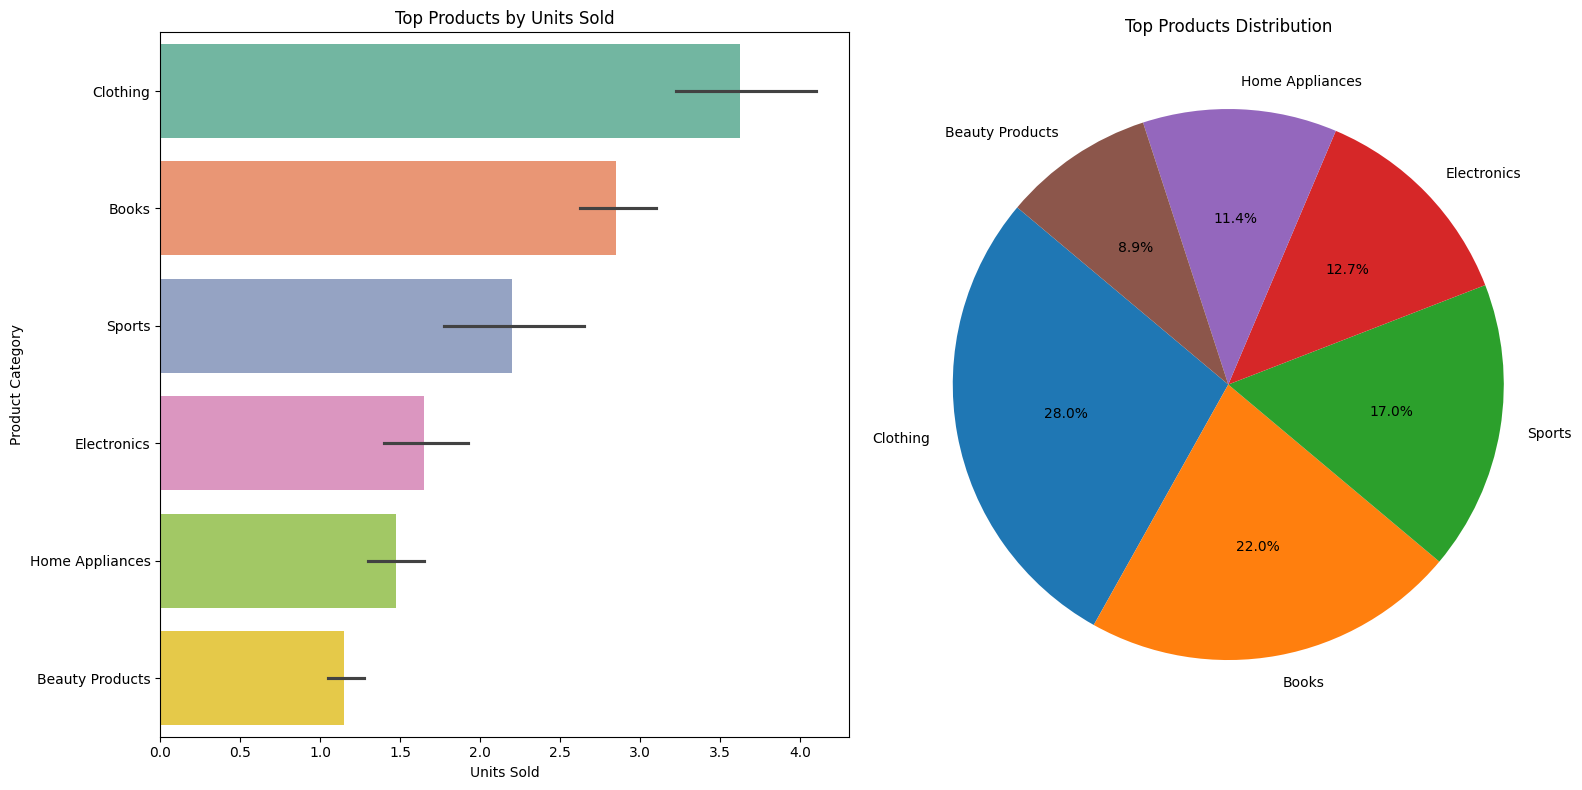

In [21]:

df = pd.DataFrame(data)
product_units_sold = df.groupby('Product Category')['Units Sold'].sum()
top_products = product_units_sold.nlargest(10)

df_top_products = df[df['Product Category'].isin(top_products.index)]
top_products_proportions = top_products / top_products.sum()

fig, axs = plt.subplots(1, 2, figsize=(16, 8))  
sns.barplot(data=df_top_products, y='Product Category', x='Units Sold', ax=axs[0], order=top_products.index, palette='Set2')
axs[0].set_title('Top Products by Units Sold')
axs[0].tick_params(axis='y', labelsize=10)  
axs[0].set_xlabel('Units Sold')
axs[0].set_ylabel('Product Category')

# Pie Chart
axs[1].pie(top_products_proportions, labels=top_products_proportions.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Top Products Distribution')
plt.tight_layout()
plt.show()


Clothing is the most popular product category, followed by Books and Sports.
Beauty Products and Home Appliances have the lowest sales among the top 6 categories.


C:\Users\acer\AppData\Local\Temp\ipykernel_8652\3677152233.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_regions, y='Region', x='Units Sold', ax=axs[0], order=top_regions.index, palette='Set2')


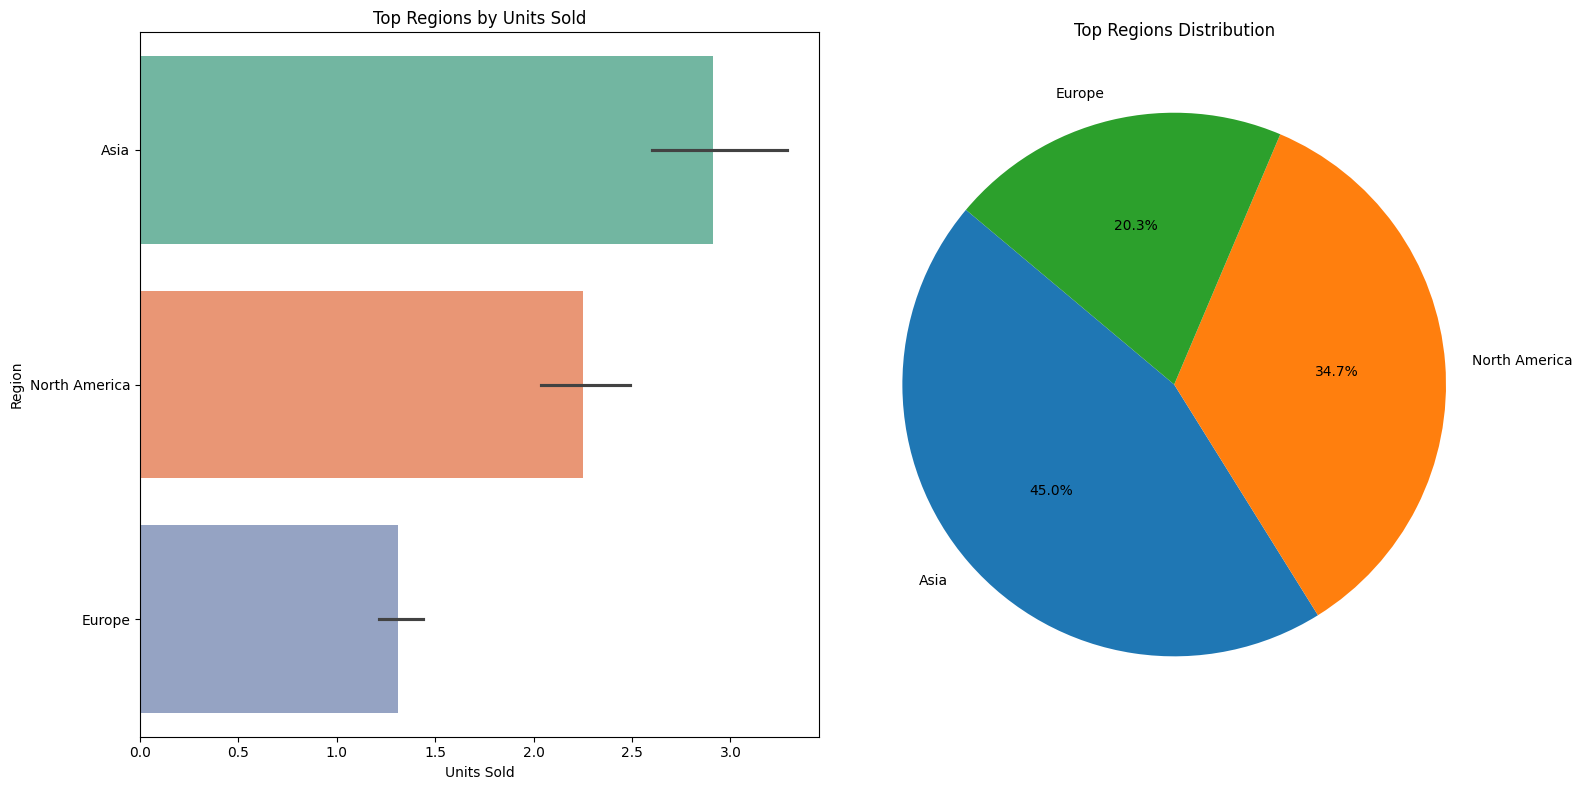

In [22]:
df = pd.DataFrame(data)
region_units_sold = df.groupby('Region')['Units Sold'].sum()
top_regions = region_units_sold.nlargest(10)
df_top_regions = df[df['Region'].isin(top_regions.index)]
top_regions_proportions = top_regions / top_regions.sum()

fig, axs = plt.subplots(1, 2, figsize=(16, 8))  
sns.barplot(data=df_top_regions, y='Region', x='Units Sold', ax=axs[0], order=top_regions.index, palette='Set2')
axs[0].set_title('Top Regions by Units Sold')
axs[0].tick_params(axis='y', labelsize=10)  
axs[0].set_xlabel('Units Sold')
axs[0].set_ylabel('Region')

axs[1].pie(top_regions_proportions, labels=top_regions_proportions.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Top Regions Distribution')
plt.tight_layout()
plt.show()


Asia is the most popular region, followed by North America and Europe.

In [25]:

df = pd.DataFrame(data)

total_revenue_per_category = df.groupby('Product Category')['Total Revenue'].sum().reset_index()
total_revenue_per_category = total_revenue_per_category.sort_values(by='Total Revenue', ascending=False)

fig = px.bar(
    total_revenue_per_category,
    x='Product Category',
    y='Total Revenue',
    color='Total Revenue',
    color_continuous_scale='greens',  
    title='Total Revenue by Product Category'
)

fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Total Revenue',
    xaxis_tickangle=-45  
)
fig.show()


Electronics is the most profitable product category, generating significantly more revenue than the others.
Home Appliances and Sports also contribute a substantial amount of revenue.
Clothing, Beauty Products, and Books generate relatively low revenue compared to the top three categories.

In [26]:
total_revenue_per_product = df.groupby('Product Name')['Total Revenue'].sum().reset_index()
top_products = total_revenue_per_product.nlargest(10, 'Total Revenue')

fig = px.bar(
    top_products,
    x='Product Name',
    y='Total Revenue',
    color='Total Revenue',
    color_continuous_scale='reds',  
    title='Top 10 Products by Total Revenue'
)

fig.update_layout(
    xaxis_title='Product Name',
    yaxis_title='Total Revenue',
    xaxis_tickangle=-45  
)

fig.show()


Canon EOS RS Camera is the most profitable product, generating significantly more revenue than the others.
LG OLED TV and MacBook Pro 16-inch follow closely behind, with relatively high revenue levels.
iPhone 14 Pro and Peloton Bike also contribute a substantial amount of revenue.
Garmin Forerunner 945, HP Spectre x360 Laptop, Roomba i7+, and Samsung Galaxy Tab S8 generate lower revenue compared to the top products.

In [31]:
df = pd.DataFrame(data)
total_revenue_per_region = df.groupby('Region')['Total Revenue'].sum().reset_index()
top_regions = total_revenue_per_region.nlargest(10, 'Total Revenue')

custom_blue_scale = [
    [0.0, 'lightblue'], 
    [0.5, 'blue'],      
    [1.0, 'darkblue']   
]

fig = px.bar(
    top_regions,
    x='Region',
    y='Total Revenue',
    color='Total Revenue',
    color_continuous_scale=custom_blue_scale,  
    title='Top 10 Regions by Total Revenue'
)

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Total Revenue',
    xaxis_tickangle=-45  
)

fig.show()



North America is the most profitable region, generating significantly more revenue than the others.
Asia and Europe contribute a substantial amount of revenue, but not as much as North America.

In [34]:

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

df = df.dropna(subset=['Date'])
monthly_revenue = df.resample('M', on='Date')['Total Revenue'].sum().reset_index()

monthly_revenue['MonthYear'] = monthly_revenue['Date'].dt.strftime('%b %Y')
fig = px.line(
    monthly_revenue,
    x='MonthYear',
    y='Total Revenue',
    title='Monthly Total Revenue Over Time',
    line_shape='linear',  
    markers=True,        
    color_discrete_sequence=['#1f77b4'] 
)

fig.update_layout(
    title={
        'text': 'Monthly Total Revenue Over Time',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'color': '#333'}
    },
    xaxis_title='Date',
    yaxis_title='Total Revenue',
    xaxis=dict(
        tickangle=-45,
        tickmode='array',
        tickvals=monthly_revenue['MonthYear'], 
        ticktext=[pd.to_datetime(d).strftime('%b %Y') for d in monthly_revenue['Date']]
    ),
    yaxis=dict(
        tickprefix='$', 
        showgrid=True,
        gridcolor='rgba(200, 200, 200, 0.3)'
    ),
    margin=dict(l=50, r=50, t=80, b=50),
    plot_bgcolor='white',
    paper_bgcolor='rgba(240, 240, 240, 0.5)',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        orientation='v'
    ),
    font=dict(family="Arial, sans-serif", size=12, color="#333")
)

fig.show()



Revenue peaked in January 2024 and then steadily declined throughout the year.
Revenue stabilized at a low point in August 2024.

### Conclusion

1. **Product Popularity and Sales**:
   - **Top Products**: The Hanes ComfortSoft T-Shirt is the most popular, with strong sales, followed by the Yeti Rambler Tumbler and Adidas 3-Stripes Shorts. Noteworthy mentions in the top-selling products include "The Catcher in the Rye" by J.D. Salinger and "The Girl with the Dragon Tattoo" by Stieg Larsson.
   - **Balanced Sales Distribution**: The distribution of sales among these top products is relatively balanced, indicating no single product dominates the market.

2. **Product Categories**:
   - **Most Popular Categories**: Clothing is the leading product category, followed by Books and Sports. These categories show a high level of consumer interest.
   - **Lower Sales Categories**: Beauty Products and Home Appliances have the lowest sales among the top 6 categories, suggesting these categories are less favored by consumers compared to others.

3. **Regional Sales**:
   - **Leading Regions**: Asia stands out as the most popular region, followed by North America and Europe. This indicates a strong market presence in Asia with substantial sales performance.
   - **Regional Profitability**: North America is the most profitable region, generating significantly more revenue compared to Asia and Europe, though these regions also contribute substantially to overall revenue.

4. **Profitability by Product Category**:
   - **Most Profitable Categories**: Electronics lead in profitability, with categories such as the Canon EOS RS Camera, LG OLED TV, and MacBook Pro 16-inch contributing significantly. 
   - **Other Categories**: Home Appliances and Sports also contribute substantial revenue, but categories like Clothing, Beauty Products, and Books generate comparatively lower revenue.

5. **Product Profitability**:
   - **Top Products**: The Canon EOS RS Camera is the most profitable product, followed by the LG OLED TV and MacBook Pro 16-inch. Other notable contributors include the iPhone 14 Pro and Peloton Bike.
   - **Lower Revenue Products**: Products like the Garmin Forerunner 945, HP Spectre x360 Laptop, Roomba i7+, and Samsung Galaxy Tab S8 generate lower revenue compared to the top performers.

6. **Revenue Trends**:
   - **Peak and Decline**: Revenue reached its peak in January 2024 and then experienced a steady decline throughout the year.
   - **Stabilization**: Revenue stabilized at a low point in August 2024, suggesting a plateau or downturn in sales during this period.

### Summary

The analysis reveals a dynamic sales landscape where certain products and regions stand out in terms of popularity and profitability. Electronics and specific high-end products like cameras and laptops are notably profitable. While regions like Asia and North America exhibit strong sales and profitability, revenue trends indicate a peak early in the year followed by a decline, stabilizing at a lower level towards mid-year. This comprehensive view provides valuable insights into product performance, regional market dynamics, and sales trends over time.

## Thank You